<center>
    <h1>
            Introduction to Python
    </h1></center><p><p>

<h3>Lesson four: More Pandas, and Data Visualization</h3>

15/04/2019

fabio.grassi@aalto.fi

Last week we learned how to create DataFrames in pandas, either from scratch or importing data from external sources. Here is a quick reminder:

In [1]:
import pandas as pd
import numpy as np

# Creating a DataFrame from scratch

# First, we generate some random data:

row0 = [np.random.randint(-100,100) for i in range(3)]
row1 = [np.random.randint(-100,100) for i in range(3)]
row2 = [np.random.randint(-100,100) for i in range(3)]
row3 = [np.random.randint(-100,100) for i in range(3)]

data = [row0,row1,row2,row3]

df0 = pd.DataFrame(data,columns=["a","b","c"])

df0

,a,b,c
0,-45,91,68
1,-23,-81,-85
2,19,-11,-14
3,15,-17,-81


Single columns in DataFrames can be accessed using square brackets, and the column's name:

In [2]:
df0["a"]

0   -45
1   -23
2    19
3    15
Name: a, dtype: int64

Columns can also be accessed using the notation *dataframename.columnname*, as shown below, however, this can be a problem when your column name contains spaces.

In [3]:
df0.a

0   -45
1   -23
2    19
3    15
Name: a, dtype: int64

We can filter data using .loc[]. For example, *df0.loc[df0["a"] > 0]* will return all rows where the values contained in column a are greater than 0. 

In [4]:
df0.loc[df0["a"]>0]

,a,b,c
2,19,-11,-14
3,15,-17,-81


# More Pandas! Advanced Filtering

![Pandas](https://i.redd.it/6bdaod10thq21.gif)
<center><sup>Yes, I'm obsessed with red pandas</sup></center>


### A few words about joining DataFrames:

Last week we saw that, when joining (or merging) two DataFrames, we used an argument called *how*, and we set it to *"left"*. What this means is that we did a *left join* between the two DataFrames. This nomenclature is borrowed from SQL, where the following options are possible:

* INNER JOIN
* LEFT JOIN
* RIGHT JOIN
* FULL JOIN (or FULL OUTER JOIN)

The meaning of these joins is illustrated below:

![Joins](https://i.stack.imgur.com/VQ5XP.png)

Let us look at an example: suppose we have two tables, A and B, that we want to join:

In [5]:
# Just defining to simple DataFrames.

color = ["red","blue","green","black","white","yellow"]
manufacturer = ["Volvo","Lada","FIAT","Jeep","BMW","Audi"]

carmanufacturer = lambda x: [x, np.random.choice(manufacturer)]
carcolor = lambda x: [x, np.random.choice(color)]
manufid = [0,1,3,4,6,7,9] # Notice that here we are missing IDs 2, 5, 8.
colid = [0,2,3,5,6,8,9] # While here we ar emissing 1, 4, 7.

colors = pd.DataFrame([carcolor(i) for i in colid],columns=["carID","color"])
manufacturers = pd.DataFrame([carmanufacturer(i) for i in manufid],columns=["carID","manufacturer"])

In [6]:
manufacturers

,carID,manufacturer
0,0,Lada
1,1,Volvo
2,3,Volvo
3,4,Audi
4,6,BMW
5,7,Volvo
6,9,Audi


In [7]:
colors

,carID,color
0,0,white
1,2,black
2,3,green
3,5,yellow
4,6,black
5,8,green
6,9,black


If we do an **outer** join, we get all results, regardless of whether the ID is missing in one of the tables or not:

In [8]:
manufacturers.merge(colors,how="outer",left_on="carID",right_on="carID")

,carID,manufacturer,color
0,0,Lada,white
1,1,Volvo,NaN
2,3,Volvo,green
3,4,Audi,NaN
4,6,BMW,black
5,7,Volvo,NaN
6,9,Audi,black
7,2,NaN,black
8,5,NaN,yellow
9,8,NaN,green


If we do a **left** join, we only get the rows for which the ID is present in the **left** table (in this case, manufacturers): 

In [9]:
manufacturers.merge(colors,how="left",on="carID")

,carID,manufacturer,color
0,0,Lada,white
1,1,Volvo,NaN
2,3,Volvo,green
3,4,Audi,NaN
4,6,BMW,black
5,7,Volvo,NaN
6,9,Audi,black


If we do a **right** join, we only get the rows where we have a non-nullID in the **right** table (in this case, colors):

In [10]:
manufacturers.merge(colors,how="right",on="carID")

,carID,manufacturer,color
0,0,Lada,white
1,3,Volvo,green
2,6,BMW,black
3,9,Audi,black
4,2,NaN,black
5,5,NaN,yellow
6,8,NaN,green


Lastly, if we do an **inner** join, we only get the rows for which we have non-null ID values in **both left and right** tables: 

In [11]:
manufacturers.merge(colors,how="inner",on="carID")

,carID,manufacturer,color
0,0,Lada,white
1,3,Volvo,green
2,6,BMW,black
3,9,Audi,black


Let us now import the sample data that we began to analyze last week, and then run the *.head()* method on them to quickly refresh our memory.

In [12]:
sales = pd.read_excel("./sampledataset.xlsx",sheet_name="sales")
products = pd.read_excel("./sampledataset.xlsx",sheet_name="products")
customers = pd.read_excel("./sampledataset.xlsx",sheet_name="customers")

In [13]:
sales.head()

,userid,productid,unitssold,pricebought,pricesold
0,41,0,1,2,8
1,32,23,1,4,7
2,14,6,10,2,6
3,31,26,3,4,8
4,43,11,3,4,21


In [14]:
products.head()

,id,description,category
0,0,PC,electronics
1,1,phone,electronics
2,2,tv,electronics
3,3,xbox,electronics
4,4,playstation,electronics


In [15]:
customers.head()

,id,sex,name,surname,profession,dateofbirth,city
0,0,m,Markku,Forssel,Miner,1973-01-24 00:04:00,Oulu
1,1,m,Miika,Laiho,Exorcist,1986-01-12 00:10:00,Rovaniemi
2,2,f,Mirjami,Järvinen,Miner,1975-01-23 00:04:00,Helsinki
3,3,f,Elvi,Leppä,Cashier,1987-01-27 00:07:00,Espoo
4,4,f,Henni,Kotipelto,Mailman,1993-01-24 00:01:00,Helsinki


Management has tasked us with investigating which customers generate the most profit, based on their profession. First, we need to calculate profit. As we saw in the previous lesson, we can do this by using the formula
<br>
<br>
<center><i>profit = (pricesold - pricebought) * unitssold</i></center>

In [16]:
sales["profit"] = (sales.pricesold - sales.pricebought) * sales.unitssold

In [17]:
sales

,userid,productid,unitssold,pricebought,pricesold,profit
0,41,0,1,2,8,6
1,32,23,1,4,7,3
2,14,6,10,2,6,40
3,31,26,3,4,8,12
4,43,11,3,4,21,51
5,44,7,9,2,6,36
6,95,22,3,2,5,9
7,58,6,9,3,6,27
8,64,17,1,2,6,4
9,86,7,3,4,6,6


Customer profession data is stored in the *customers* DataFrame. To analyze profits as a function of customer profession, we need to join the *sales* DataFrame with *customers*:

In [18]:
salescustomers = sales.merge(customers, how="left", left_on="userid", right_on="id")
salescustomers.head()

,userid,productid,unitssold,pricebought,pricesold,profit,id,sex,name,surname,profession,dateofbirth,city
0,41,0,1,2,8,6,41,m,Timo,Sorvali,Waiter/Waitress,1972-01-24 00:07:00,Helsinki
1,32,23,1,4,7,3,32,m,Eevert,Järvinen,Dentist,1975-01-22 00:09:00,Turku
2,14,6,10,2,6,40,14,f,Impi,Tihinen,Farmer,1971-01-01 00:05:00,Espoo
3,31,26,3,4,8,12,31,m,Juhana,Koskinen,Unemployed,1971-01-02 00:01:00,Helsinki
4,43,11,3,4,21,51,43,f,Irja,Sipilä,Miner,1995-01-21 00:03:00,Espoo


That's good. Now we are going to have to group by profession:

In [19]:
# By the way, here is a neat little trick: sometimes when you concatenate different methods on top of each other, 
# you may end up with very long lines that are difficult to read:

salescustomers.groupby(by="profession").agg("mean").sort_values(by="profit",ascending=False)["profit"]

# An easy solution to that problem is to enclose everything in parentheses: this way, you can split the code over several lines,
# thereby improving code readability, and Python will still interpret it as a single entity without getting confused:

groupedsp = (salescustomers.groupby(by="profession")
             .agg("mean")
             .sort_values(by="profit",
                          ascending=False)
             ["profit"])

groupedsp

profession
Surgeon                 32.170732
Lawyer                  31.697674
Entrepreneur            31.000000
Musician                30.882353
Baker                   30.532787
Mailman                 29.084848
Data Scientist          28.980392
Exorcist                27.200000
Waiter/Waitress         26.803571
Software Developer      24.944444
Soldier                 24.775000
Farmer                  24.682927
Teacher                 24.634146
Dentist                 24.523810
Miner                   24.402985
Student                 24.258621
Doctor                  23.424242
Cashier                 23.100000
System Administrator    23.039370
Politician              22.435897
Journalist              22.313725
Actor                   22.295238
Professional Athlete    21.956522
Full Time Parent        21.681818
Unemployed              21.250000
Name: profit, dtype: float64

Not bad, we now have some numbers that we can show to management. Unsurprisingly, surgeons and lawyers seem to be the biggest spenders, while unemployed people, having no disposable income, spend less than all other categories. But we're hoping to get a salary bump this year, so we want to show management that we can do even more than what they ask of us. Let us try to group by both profession *and* category:

In [20]:
scp = salescustomers.merge(products, how="inner", left_on="productid", right_on="id")

groupedscp = (scp.groupby(by=["profession","category"])
 .agg("median")
 .sort_values(by=["unitssold","profit"],ascending=False))

groupedscp

,,userid,productid,unitssold,pricebought,pricesold,profit,id_x,id_y
profession,category,,,,,,,,
Professional Athlete,food,45.0,7.5,12.5,3.5,6.5,42.0,45.0,7.5
Entrepreneur,food,85.0,7.5,12.0,3.5,7.0,32.0,85.0,7.5
Politician,food,64.0,7.5,11.0,3.0,7.5,42.0,64.0,7.5
Surgeon,food,53.5,7.5,10.5,3.0,7.5,43.0,53.5,7.5
Journalist,food,39.0,7.5,10.0,3.0,8.0,36.0,39.0,7.5
Musician,food,75.0,7.5,10.0,2.5,7.5,32.5,75.0,7.5
Soldier,food,64.5,7.5,9.0,3.0,8.0,46.0,64.5,7.5
Miner,food,38.5,7.5,9.0,3.0,7.0,40.0,38.5,7.5
Student,food,46.0,7.5,9.0,3.0,7.5,35.5,46.0,7.5


## Visualizing Data: Matplotlib

The above data can certainly be useful to management, but it doesn't look very good. One way we can *really* show management that we're worth keeping around is by making the data talk using visualizations.

The most common visualization tool in Python is **matplotlib**:

In [21]:
import matplotlib.pyplot as plt

Now we can begin to visualize our data. Let us try a bar chart:

In [22]:
groupedsp.index

Index(['Surgeon', 'Lawyer', 'Entrepreneur', 'Musician', 'Baker', 'Mailman',
       'Data Scientist', 'Exorcist', 'Waiter/Waitress', 'Software Developer',
       'Soldier', 'Farmer', 'Teacher', 'Dentist', 'Miner', 'Student', 'Doctor',
       'Cashier', 'System Administrator', 'Politician', 'Journalist', 'Actor',
       'Professional Athlete', 'Full Time Parent', 'Unemployed'],
      dtype='object', name='profession')

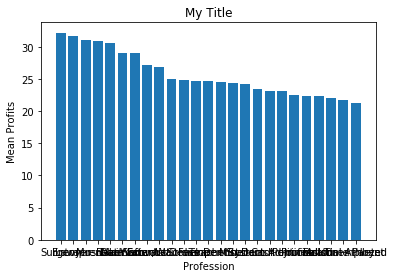

In [23]:
x = range(len(groupedsp)) # Defining the positions of the bars.
y = groupedsp # Bar heights.
plt.bar(x, y) # Plotting the bar chart.
plt.title("My Title") # Setting a title.
plt.xlabel("Profession") # x axis label.
plt.ylabel("Mean Profits") # y axis label.
plt.xticks(x,labels=groupedsp.index) # The labels to be displayed under each bar. 
plt.show() # Finally showing the bar chart.

Not a bad start, but the ticks on the x axis are unreadable. Let us try to rotate them:


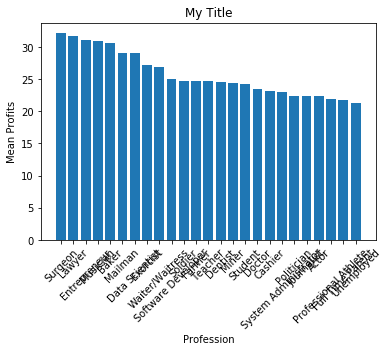

In [24]:
x = range(len(groupedsp.index))
y = groupedsp
plt.bar(x, y)
plt.title("My Title")
plt.xlabel("Profession")
plt.ylabel("Mean Profits")
plt.xticks(x,groupedsp.index, rotation=45) # We rotated the labels here.
plt.show()

Better, but still not enough to impress management. When we have very long labels on the x axis, it is best to use a horizontal bar chart:

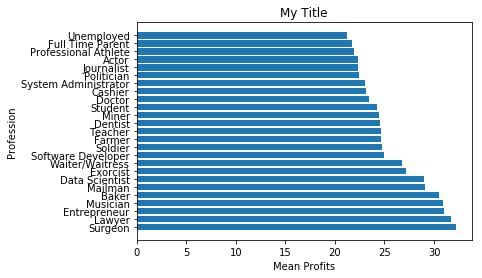

In [25]:
x = range(len(groupedsp.index))
y = groupedsp
plt.barh(x,y) # Notice now it's barh, not bar.
plt.title("My Title")
plt.ylabel("Profession")
plt.xlabel("Mean Profits")
plt.yticks(x,groupedsp.index)
plt.show()

Much better! But the picture is a bit too small. Let us expand it:

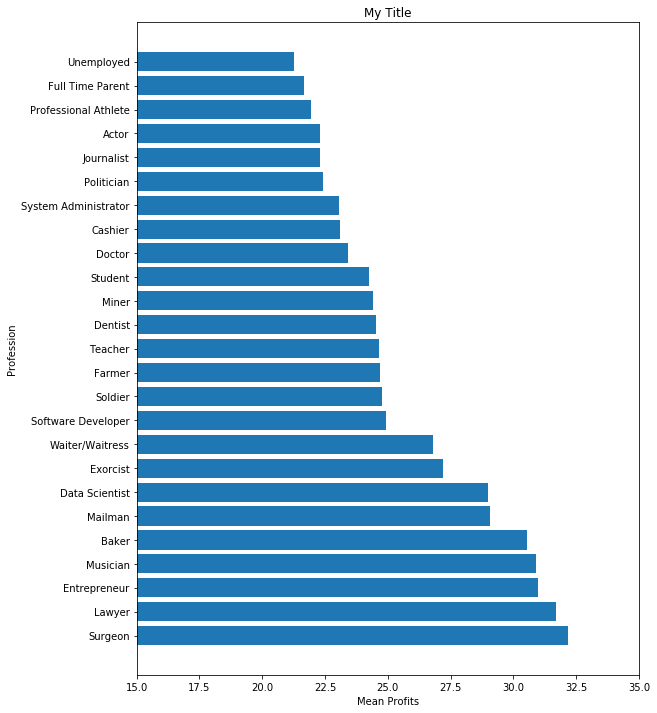

In [26]:
x = range(len(groupedsp.index))
y = groupedsp
plt.figure(figsize=(9,12)) # Width, height.
plt.barh(x,y) 
plt.title("My Title")
plt.ylabel("Profession")
plt.xlabel("Mean Profits")
plt.yticks(x,groupedsp.index)
plt.xlim(15,35)
plt.show()

Now we're talking. And there's plenty more things we can do. Let us import another library: **seaborn**.

In [27]:
import seaborn as sns

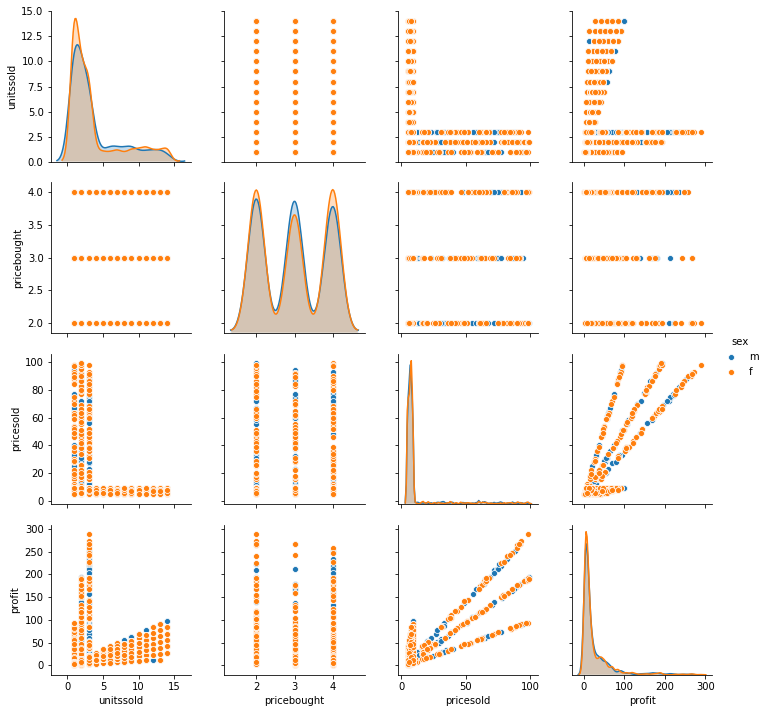

In [33]:
spc = (sales.merge(products, how="inner", right_on="id",left_on="productid") # Joining sales with products 
                  .merge(customers,how="inner",left_on="userid",right_on="id")) # Joining customers with the result of the previous join
sns.pairplot(spc[["unitssold","pricebought","pricesold","profit","sex"]],hue="sex",diag_kind="kde") # Plotting a pairplot.
plt.show()

Looks fancy doesn't it?